In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/labeled_validation_dataset.jsonl


In [30]:
# Import necessary libraries
import numpy as np # for linear algebra
import pandas as pd # for data analysis
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for data visualization
import plotly.express as px # for interactive data visualization
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

# Model
from sklearn.model_selection import train_test_split # split data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score # for model evaluation

In [31]:
import pandas as pd

# read the JSONL file into a pandas dataframe
df = pd.read_json('/kaggle/input/dataset/labeled_validation_dataset.jsonl', lines=True)

# display the dataframe
print(df.head())

   example_id                                          paragraph  \
0           0  وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...   
1           1  ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...   
2           2  قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...   
3           3  دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...   
4           4  السوريون يصرون على استقلال بلادهم : و مثلما رف...   

                                             summary  
0  يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...  
1  دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...  
2  أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...  
3  مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...  
4  الشعب السوري يصر على استقلال بلدهم من السيطرة ...  


In [32]:
import pandas as pd

# read the JSONL file into a pandas dataframe
df = pd.read_json('/kaggle/input/dataset/labeled_validation_dataset.jsonl', orient='records', lines=True)

# display the dataframe
print(df.head())

   example_id                                          paragraph  \
0           0  وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...   
1           1  ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...   
2           2  قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...   
3           3  دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...   
4           4  السوريون يصرون على استقلال بلادهم : و مثلما رف...   

                                             summary  
0  يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...  
1  دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...  
2  أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...  
3  مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...  
4  الشعب السوري يصر على استقلال بلدهم من السيطرة ...  


In [33]:
df

,example_id,paragraph,summary
0,0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...
1,1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...
2,2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...
3,3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...
4,4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...
...,...,...,...
149,149,حزب الوفد سيحتفل بمئوية ثورة 1919 يوم 9 مارس ا...,احتفال مئوية ثورة 1919 كان من منطلق وطني ليس ح...
150,150,حيث أعلن مجلس قيادة الثورة في 18 يونيه 1953 قي...,مجلس قيادة الثورة أعلن عن قيام الجمهورية المصر...
151,151,وبرغم أن عبد الرحمن فهمي كان يضم في ذلك الجهاز...,ضم عبد الرحمن فهمي في الجهاز السري عدد كبير من...
152,152,ولم تقتصر مقومات بورسعيد كمدينة عالمية منذ نشأ...,امتدت بورسعيد لكي تشمل الطابع الثقافي للمدينة،...


In [34]:
df['paragraph']

0      وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...
1      ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...
2      قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...
3      دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...
4      السوريون يصرون على استقلال بلادهم : و مثلما رف...
                             ...                        
149    حزب الوفد سيحتفل بمئوية ثورة 1919 يوم 9 مارس ا...
150    حيث أعلن مجلس قيادة الثورة في 18 يونيه 1953 قي...
151    وبرغم أن عبد الرحمن فهمي كان يضم في ذلك الجهاز...
152    ولم تقتصر مقومات بورسعيد كمدينة عالمية منذ نشأ...
153    أول رئيس للجزائر بعد الاستقلال الرئيس أحمد بن ...
Name: paragraph, Length: 154, dtype: object

In [35]:
df_shuffled = df.sample(frac=1)

In [36]:
#inoformation
df.info()
# there is zero null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   example_id  154 non-null    int64 
 1   paragraph   154 non-null    object
 2   summary     154 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.7+ KB


# Processing Data

In [37]:
import nltk# Importing the nltk module
from nltk.corpus import stopwords# Importing the stopwords corpus from the nltk library

nltk.download('stopwords') # Downloading the stopwords corpus for Arabic

stop_words = list(set(stopwords.words('arabic'))) # Creating a list of stopwords for Arabic by calling the 'stopwords.words' function from the 'stopwords' corpus and passing 'arabic' as a parameter.
#The list is then converted to a set to remove duplicates and then converted back to a list.

print(stop_words) 

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['ز', 'هاكَ', 'لستم', 'أمامكَ', 'ذوا', 'هذان', 'مكانكما', 'إياك', 'صراحة', 'كلا', 'ء', 'كي', 'قرش', 'ليرة', 'إمّا', 'أبدا', 'اللذان', 'لعمر', 'صهٍ', 'لهما', 'سبع', 'ذه', 'وَيْ', 'إليك', 'مافتئ', 'أنتن', 'ّأيّان', 'رجع', 'فو', 'ق', 'كأيّ', 'لولا', 'صاد', 'إليكنّ', 'أفريل', 'ست', 'هلم', 'نا', 'لكي', 'م', 'اللذين', 'أصلا', 'نبَّا', 'سرعان', 'لك', 'مما', 'يفعلان', 'وراءَك', 'لكنما', 'إياها', 'إحدى', 'مائة', 'بهن', 'أخذ', 'أربعاء', 'إما', 'مع', 'له', 'آهٍ', 'أهلا', 'رويدك', 'تبدّل', 'إيهٍ', 'ين', 'باء', 'حمدا', 'عدا', 'ذاك', 'دونك', 'قد', 'خمسين', 'هَاتَيْنِ', 'هَؤلاء', 'يناير', 'سبتمبر', 'حيث', 'كى', 'وإذ', 'فإن', 'ليستا', 'ر', 'أطعم', 'عجبا', 'مايو', 'عيانا', 'أف', 'صار', 'ث', 'أولاء', 'كأي', 'ظاء', 'سرا', 'عين', 'مرّة', 'ومن', 'خاصة', 'هَيْهات', 'قطّ', 'ذات', 'الألاء', 'إيانا', 'اللواتي', 'إلى', 'شمال', 'ما انفك', 'طفق', 'عند', 'ثلاثاء', 'إذن', 'ءَ', 'ش', 'بها', 'في

In [38]:
import re # Importing the 're' module for regular expression operations
import string # Importing the 'string' module for string operations
import sys# Importing the 'sys' module for system-specific parameters and functions
import argparse # Importing the 'argparse' module for parsing command-line arguments
from nltk.tokenize import word_tokenize  # Importing the 'word_tokenize' function from the 'nltk.tokenize' module for tokenizing text into words

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''  # Defining a string of Arabic punctuations
english_punctuations = string.punctuation   # Defining a string of English punctuations using the 'punctuation' attribute from the 'string' module
punctuations_list = arabic_punctuations + english_punctuations  # Creating a list of punctuations by concatenating the Arabic and English punctuations using the '+' operator
# The 'and' keyword in the last line doesn't do anything useful here and can be removed.

# Now you can use the 'punctuations_list' variable to remove punctuations from text data.


In [39]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Define a function to remove diacritics from Arabic text
def remove_diacritics(text):
    arabic_diacritics = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(arabic_diacritics, '', str(text))
    return text

# Define a function to remove emojis from text
def remove_emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

# Define a function to clean text by removing punctuation, emojis, diacritics and stopwords
def clean_text(text):
    # Remove punctuation from text
    text = "".join([word for word in text if word not in string.punctuation])
    
    # Remove emojis from text
    text = remove_emoji(text)
    
    # Remove diacritics from Arabic text
    text = remove_diacritics(text)
    
    # Tokenize text into words
    tokens = word_tokenize(text)
    
    # Remove stopwords from text
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in tokens if word.lower() not in stop_words])
    
    return text


In [40]:
df.head(5)

,example_id,paragraph,summary
0,0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...
1,1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...
2,2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...
3,3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...
4,4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...


In [41]:
df['cleanedparagraph'] = df['paragraph'].apply(clean_text)
df['cleanedsummary'] = df['summary'].apply(clean_text)

In [42]:
from nltk.stem import ISRIStemmer
def process_text(text):
    # Create an instance of the ISRIStemmer
    stemmer = ISRIStemmer()
    
    # Tokenize the text into words
    word_list = nltk.word_tokenize(text)
    
    # Stem each word in the word_list using the ISRIStemmer
    word_list = [stemmer.stem(w) for w in word_list]
    
    # Join the stemmed words back into a string and return it
    return ' '.join(word_list)

In [43]:
df['final_paragraph']=df['cleanedparagraph'].apply(process_text)
df['final_summary']=df['cleanedsummary'].apply(process_text)

In [46]:
! pip install arabic-reshaper

In [47]:
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
from nltk.probability import FreqDist

In [50]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [51]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

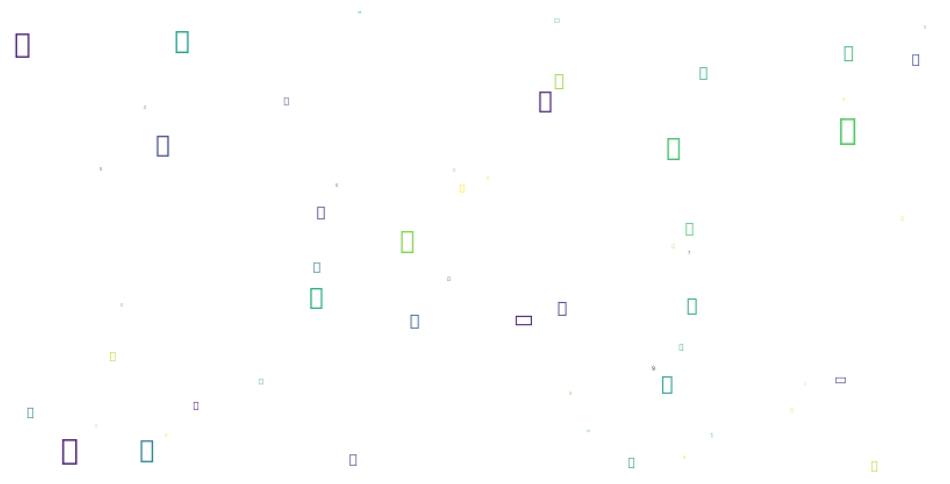

In [54]:
# Reshape Arabic text
df['reshaped_text'] = df['final_paragraph'].apply(lambda x: arabic_reshaper.reshape(x))
df['display_text'] = df['reshaped_text'].apply(lambda x: get_display(x))

# Generate WordCloud
word_freq = FreqDist([word for sentence in df['final_summary'] for word in sentence])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, max_font_size=50, random_state=42).generate_from_frequencies(word_freq)

# Display WordCloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

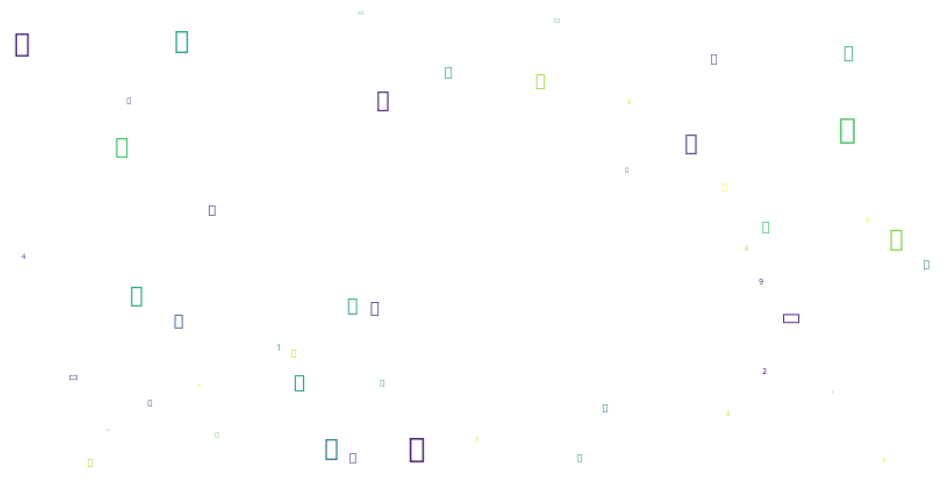

In [57]:
# Reshape Arabic text
df['reshaped_textS'] = df['final_summary'].apply(lambda x: arabic_reshaper.reshape(x))
df['display_textS'] = df['reshaped_text'].apply(lambda x: get_display(x))

# Generate WordCloud
word_freq = FreqDist([word for sentence in df['final_paragraph'] for word in sentence])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, max_font_size=50, random_state=42).generate_from_frequencies(word_freq)

# Display WordCloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()